# 2.5  Random search

- In this Section we describe our first local optimization algorithms - *random local search*.


- With this instance of the general local optimization framework discussed in the previous Section we seek out a descent direction at each step by examining a number of random directions stemming from our current point.  


- Like the global optimization scheme, scales poorly with the dimension of input and ultimately disqualifying random search for use with many modern machine learning problems.  

- However this zero-order approach to local optimization is extremely useful as a simple example of the general framework introduced previously, allowing us to give simple yet concrete algorithmic example of universally present ideas like *descent directions*, various choices for the *steplength parameter*, and *issues of convergence*.

- You can toggle the code on and off in this presentation via the button below.

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import math_optimization_library as optlib
import numpy as np
static_plotter = optlib.static_plotter.Visualizer();

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

%load_ext autoreload
%autoreload 2

## The random search algorithm

 - The defining characteristic of the *random local search* (or just *random search*) - as is the case with every local optimization method - is how the descent direction $\mathbf{d}^{k-1}$ is chosen.
 
 
- With random search we do (perhaps) the laziest possible thing: we look locally around the current point in a fixed number of random directions for a point that has a lower evaluation, and if we find one we move to it.  


- This idea illustrated figuratively in the picture below, where the function being minimized is the simple quadratic $g(w_1,w_2) = w_1^2 + w_2^2 + 2$, written more compactly as $g(\mathbf{w}) = \mathbf{w}^T \mathbf{w}^{\,} + 2$.  



- Here for visualization purposes we set the number of random directions sampled $P = 3$.  At each step only one of the three candidates produces a *descent direction* - drawn as a yellow arrow - while the other two are *ascent directions* drawn in blue.

<img src= '../../mlrefined_images/math_optimization_images/local.png' width="75%" height="100%"/>

- More precisely, at the $k^{th}$ step of random search we pick a number $P$ of random directions to try out.  


- Generating the $p^{th}$ random direction $\mathbf{d}^p$ stemming from the previous step $\mathbf{w}^{k-1}$ we have a candidate point to evaluate

\begin{equation}
\mathbf{w}_{\text{candidate}} = \mathbf{w}^{k-1} + \mathbf{d}^{p}
\end{equation}

- After evaluating all $P$ candidate points we pick the one that gives us the *smallest* evaluation i.e., the one with the index given by the smallest evaluation 

\begin{equation}
s = \underset{p=1...P}{\text{argmin}}\,\,g\left(\mathbf{w}^{k-1} +  \mathbf{d}^p\right)
\end{equation}

- Finally, if best point found has a smaller evaluation than the current point i.e., if  $g\left(\mathbf{w}^{k-1} + \mathbf{d}^s\right) < g\left(\mathbf{w}^{k-1}\right)$ then we move to the new point $\mathbf{w}^k = \mathbf{w}^{k-1} + \mathbf{d}^s$, otherwise we examine another batch of $P$ random directions and try again.

- If we are to choose a set of directions at each step randomly, how shall we choose them?  

- One idea could be to use choose some distribution - e.g., a Gaussian - and (at each step) use samples from this distribution as our candidate directions.  


- The only issue with doing this is one of consistency: each of the candidate directions - if constructed in this way - would have different lengths.  

- Since we have no apriori reason for doing this at each step, to keep our random candidate directions consistent we can normalize them to have the same length e.g., length one. 


- Indeed this is how we illustrated the algorithm figuratively in the illustration above.  If we use directions of unit-length in our algorithm - i.e., where $\Vert \mathbf{d} \Vert_2 = 1$  always - this means that at each step of the algorithm we move a distance of length one since

\begin{equation}
\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \Vert \left(\mathbf{w}^{k-1} + \mathbf{d}\right) - \mathbf{w}^{k-1} \Vert_2  = \Vert \mathbf{d}  \Vert_2 = 1.
\end{equation}

- From here we can adjust each step to have whatever length we desire by introducing a *steplength parameter* $\alpha$ into each step to completely control how far we travel with each step (as discussed in the previous Section).  This more general step looks like the following 

\begin{equation}
\mathbf{w}^k = \mathbf{w}^{k-1} + \alpha\mathbf{d}^{\,}
\end{equation}

- The length of this step - using a unit-length directions - is now exactly equal to the steplength $\alpha$, as

\begin{equation}
\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \Vert \left(\mathbf{w}^{k-1} + \alpha\mathbf{d} \right) - \mathbf{w}^{k-1} \Vert_2  = \Vert \alpha \mathbf{d}  \Vert_2 = \alpha \Vert \mathbf{d}  \Vert_2 = \alpha
\end{equation}


- Now at the $k^{th}$ step we try out $P$ unit-length random directions - but scaled by the steplength parameter so that the distance we travel is actually $\alpha$ - taking the one that provides the greatest decrease in function value.

#### <span style="color:#a50e3e;">Example. </span>  Random search applied to minimize a simple quadratic

- Below we show the result of running random local search for 4 steps with $\alpha = 1$ for all steps, at each step searching for $P = 1000$ random directions to minimize the simple quadratic $g(w_0,w_1) = w_0^2 + w_1^2 + 2$


- A three-dimensional view is shown on the left, along with the set of steps produced by the algorithm colored from green - at the start of the run where we initialize at $\mathbf{w}^0 = \begin{bmatrix}3 \\ 4\end{bmatrix}$ - to red when the algorithm halts.  


- In the right panel is the same picture, only viewed from directly above. 

<IPython.core.display.Javascript object>


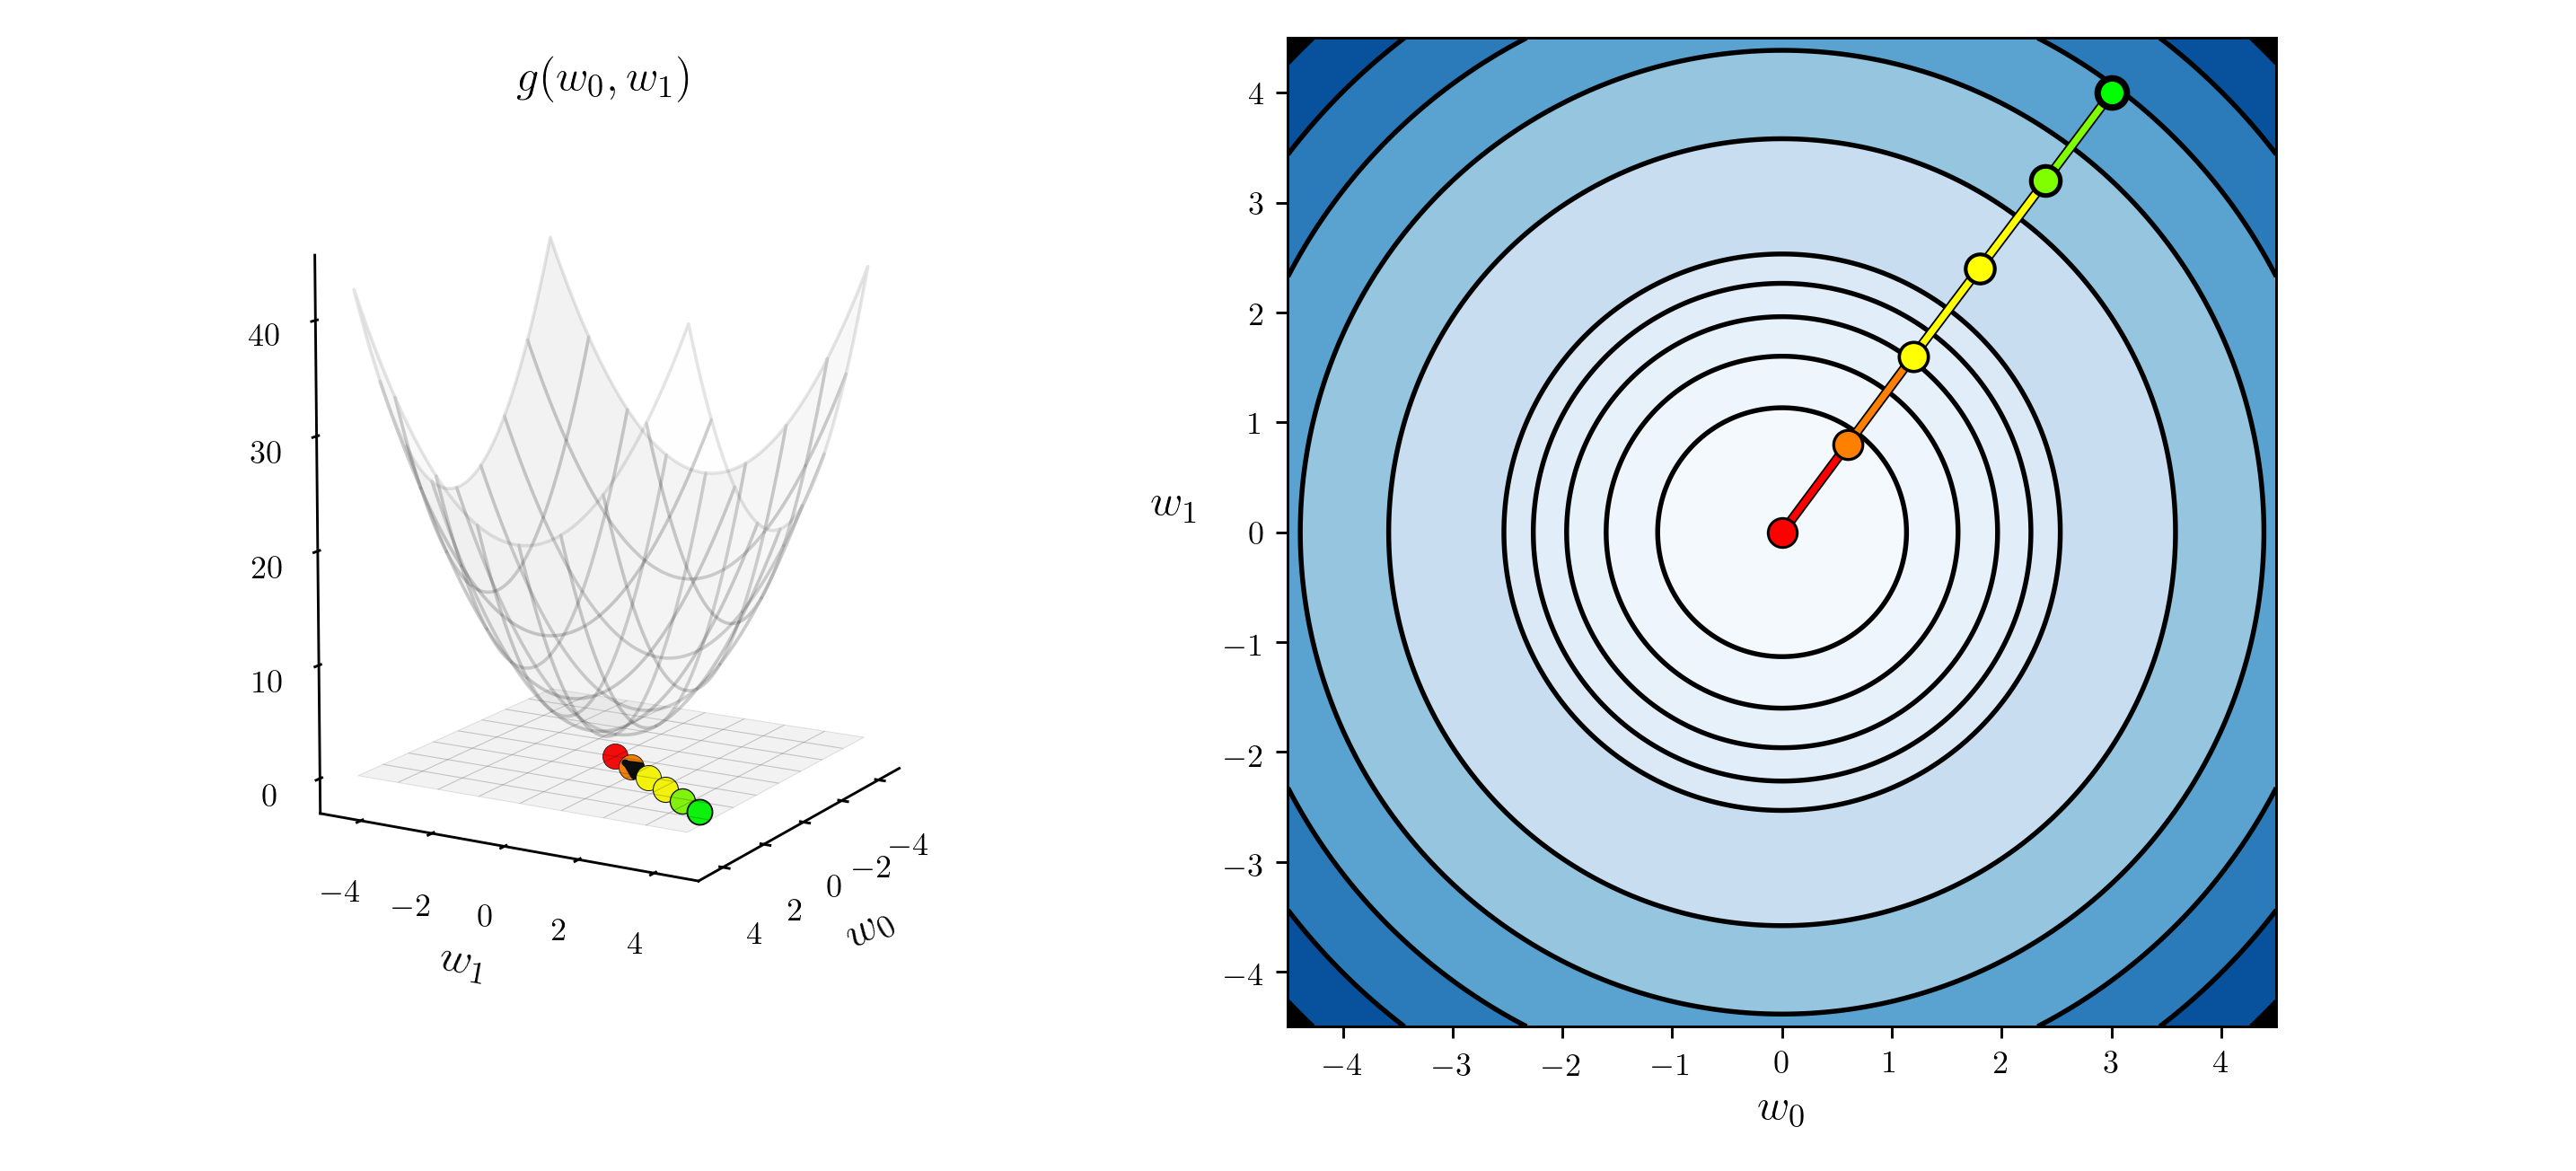

In [8]:
# This code cell will not be shown in the HTML version of this notebook
# define function
g = lambda w: np.dot(w.T,w) + 2

# run random search algorithm 
alpha_choice = 1; w = np.array([3,4]); num_samples = 1000; max_its = 5;
weight_history,cost_history = random_search(g,alpha_choice,max_its,w,num_samples)

# show run in both three-dimensions and just the input space via the contour plot
static_plotter.two_input_surface_contour_plot(g,weight_history,view = [10,30],xmin = -4.5, xmax = 4.5, ymin = -4.5, ymax = 4.5)

- If $N$ is greater than $2$ we cannot make a plot like the ones above to tell how well a particular run of random search performed - or any local optimization method for that matter. 

- A more general way to view the steps from the particular run of any local method regardless of input dimension is to plot the corresponding sequence of function evaluations.  


- That is if the returned history of weights from a local method run is $\left\{\mathbf{w}^{k}\right\}_{k=0}^K$ we plot corresponding function evaluations $\left\{g\left(\mathbf{w}^{k}\right)\right\}_{k=0}^K$ as pairs $\left(k\,, g\left(\mathbf{w}^k\right)\right)$ as we demonstrate below.  


- This allows us to tell - regardless of the input dimension $N$ - how the algorithm performed, and is called a *cost function history plot*.

<IPython.core.display.Javascript object>


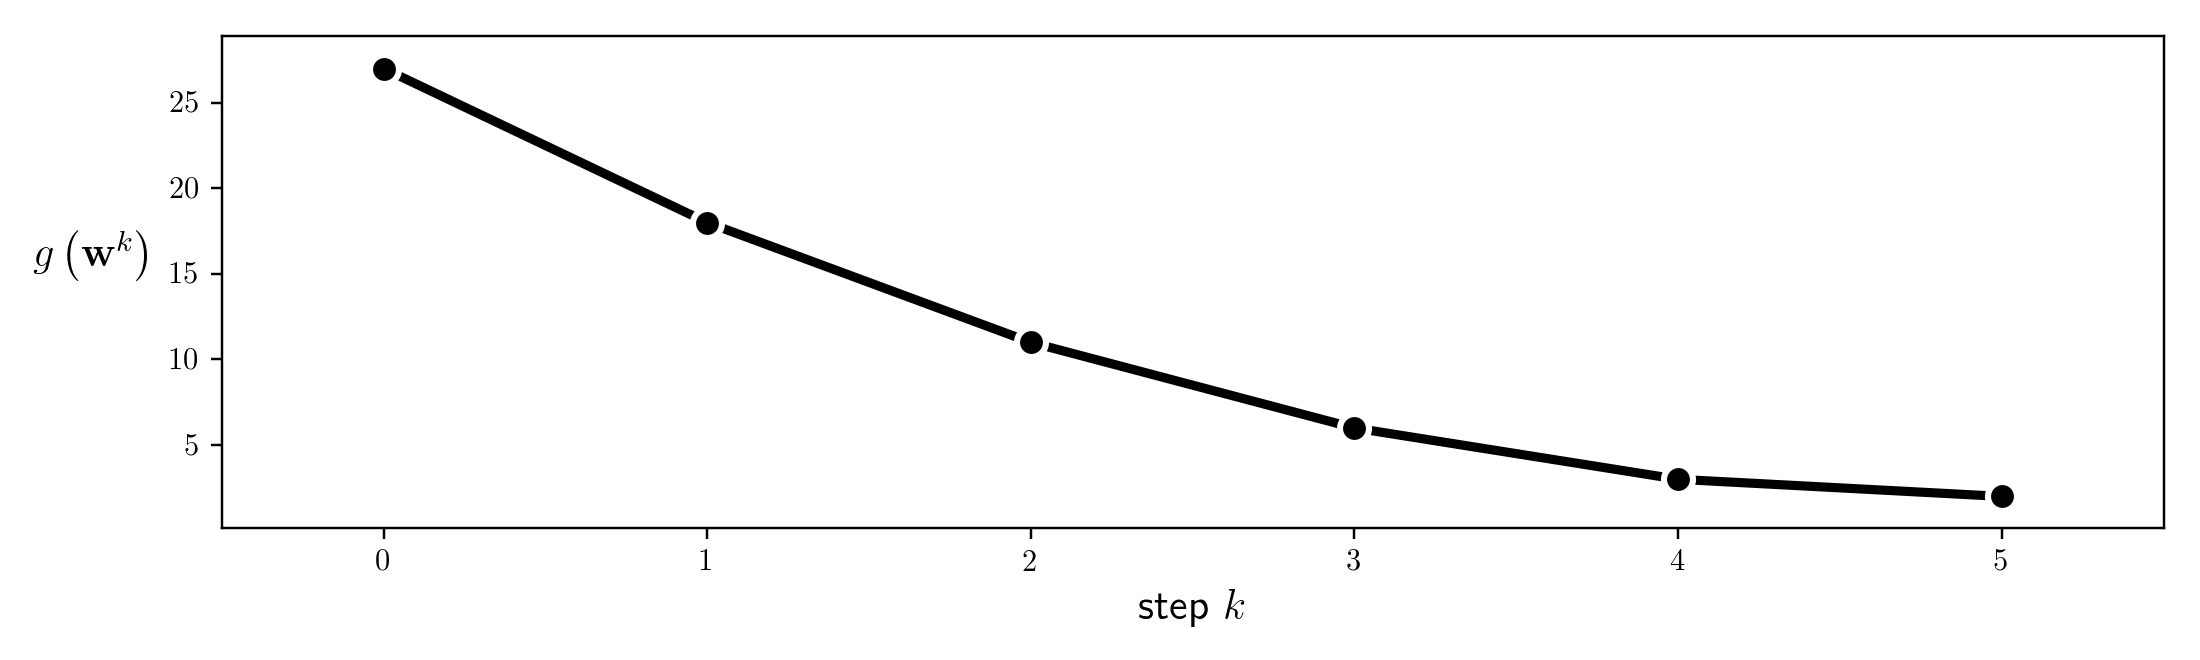

In [4]:
# This code cell will not be shown in the HTML version of this notebook
# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history],start = 0,points = True)

#### <span style="color:#a50e3e;">Example. </span>  Minimizing a function with many local minima using random search

- In this example we show what one may need to do in order to find the global minimum of a function using (normalized) random local search. 


- For visualization purposes we use the single-input function $g(w) = \text{sin}(3w) + 0.1w^2$.


- We initialize two runs - at $w^0 = 4.5$ and $w^0 = -1.5$.  For both runs we use a steplength of $\alpha = 0.1$ fixed for all 10 iterations.  

<IPython.core.display.Javascript object>


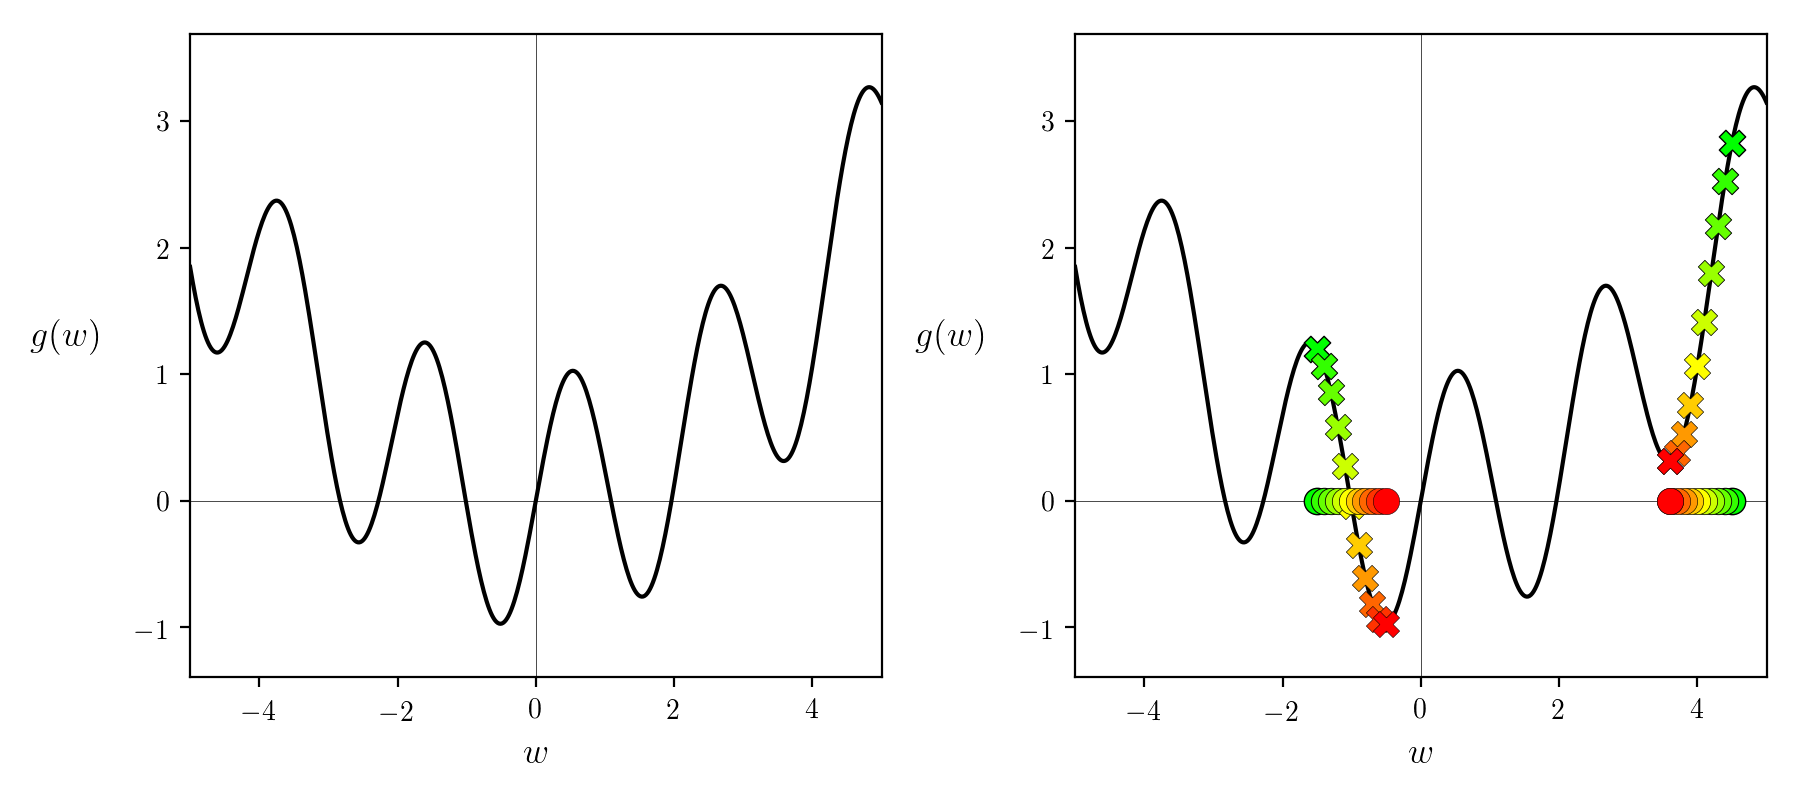

In [8]:
# This code cell will not be shown in the HTML version of this notebook
# define function
g = lambda w: np.sin(3*w) + 0.1*w**2

# run random search algorithm 
alpha_choice = 0.1; w = 4.5; num_samples = 10; max_its = 10;
weight_history_1,cost_history_1 = random_search(g,alpha_choice,max_its,w,num_samples)

alpha_choice = 0.1; w = -1.5; num_samples = 10; max_its = 10;
weight_history_2,cost_history_2 = random_search(g,alpha_choice,max_its,w,num_samples)

# make static plot showcasing each step of this run
static_plotter.single_input_plot(g,[weight_history_1,weight_history_2],[cost_history_1,cost_history_2],wmin = -5,wmax = 5)

- As can be seen by the result depending on where we initialize we may end up near a local or global minimum - here resulting from the first and second initialization respectively.  

## Exploring fundamental steplength rules

- In the examples of the previous Subsection we steplength parameter $\alpha$ set fixed for all steps of each run.  


- This choice - to take one value for $\alpha$ and use if to each and every step of the algorithm - is called a fixed *steplength rule*.


- One can also imagine changing the value of $\alpha$ from step-to-step in a single run of a local algorithm.  A rule that adjusts the value of $\alpha$ from step-to-step is often referred to as an *adjustable* steplength rule, of which there are many in use.  

- One of the most common adjustable steplength rule is the so-called *diminishing* steplength rule, which we explore here.

#### <span style="color:#a50e3e;">Example. </span>  Unit length steps fail to converge to global minimum

- Here we re-run the random local search algorithm using the same simple quadratic and algorithm settings as described in the first Example above.


- Now we initialize at the point $\mathbf{w}^0 = \begin{bmatrix} 1.5 \\ 2 \end{bmatrix}$ which prevents the algorithm from reaching the function's global minimum.  

<IPython.core.display.Javascript object>


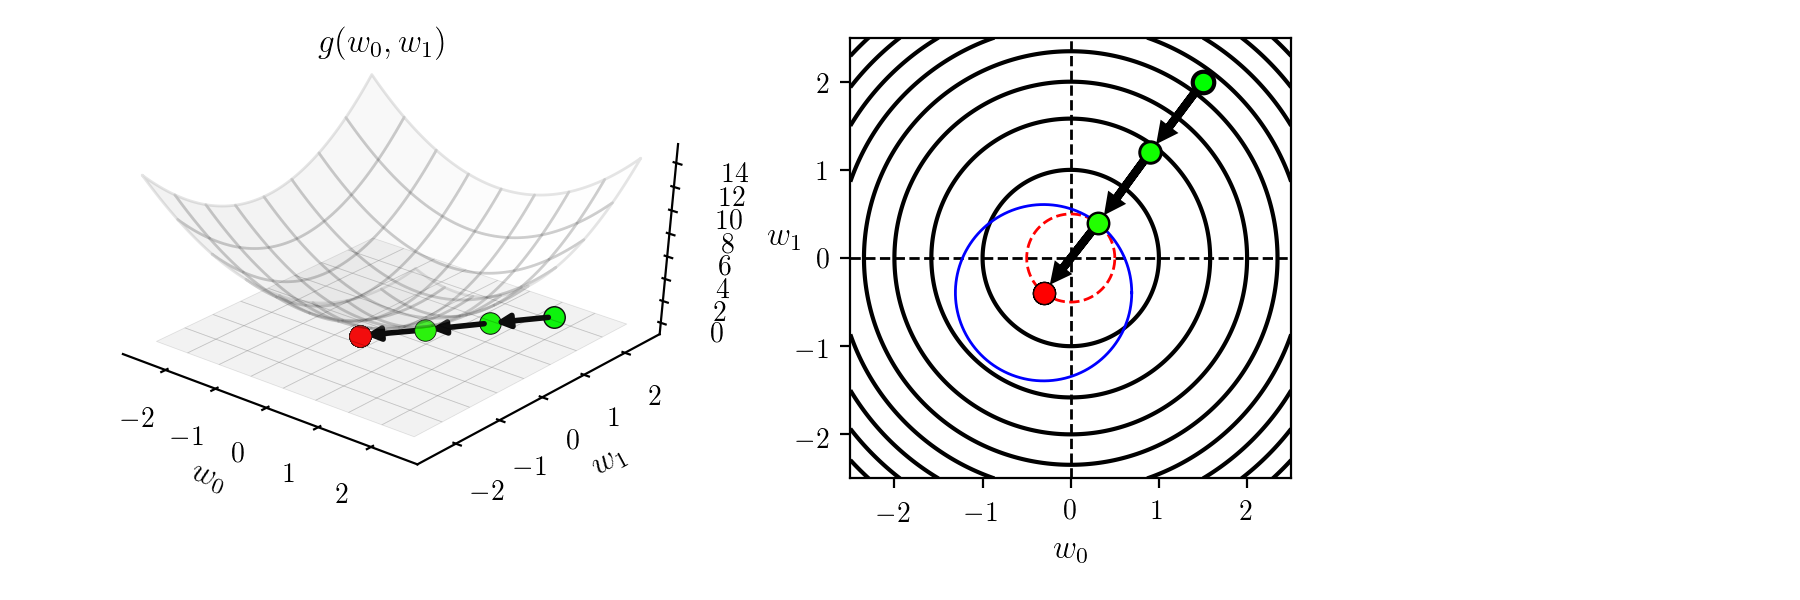

In [16]:
# This code cell will not be shown in the HTML version of this notebook
# define function
g = lambda w: np.dot(w.T,w) + 2

# run random search algorithm 
alpha_choice = 1; w = np.array([1.5,2]); num_samples = 1000; max_its = 30;
weight_history_1,cost_history_1 = random_search(g,alpha_choice,max_its,w,num_samples)

# animate 2d slope visualizer
view = [40,-50]
optlib.random_local_search.visualize3d(g,weight_history_1,cost_history_1,view = view,wmax=max(w[0],w[1]),plot_final = True,axes = True)

- The problem here is that each direction we take must have length one since we have set $\alpha = 1$ for all steps - thus the length of each step must be length one as well.  


- If we could take *shorter* steps we could in fact descend onto lower contours of the quadratic, and get closer to the global minimum. 

- We can visualize how the final 25 steps of this sort of run fail to descend by plotting the corresponding cost function history, which we do below.  

<IPython.core.display.Javascript object>


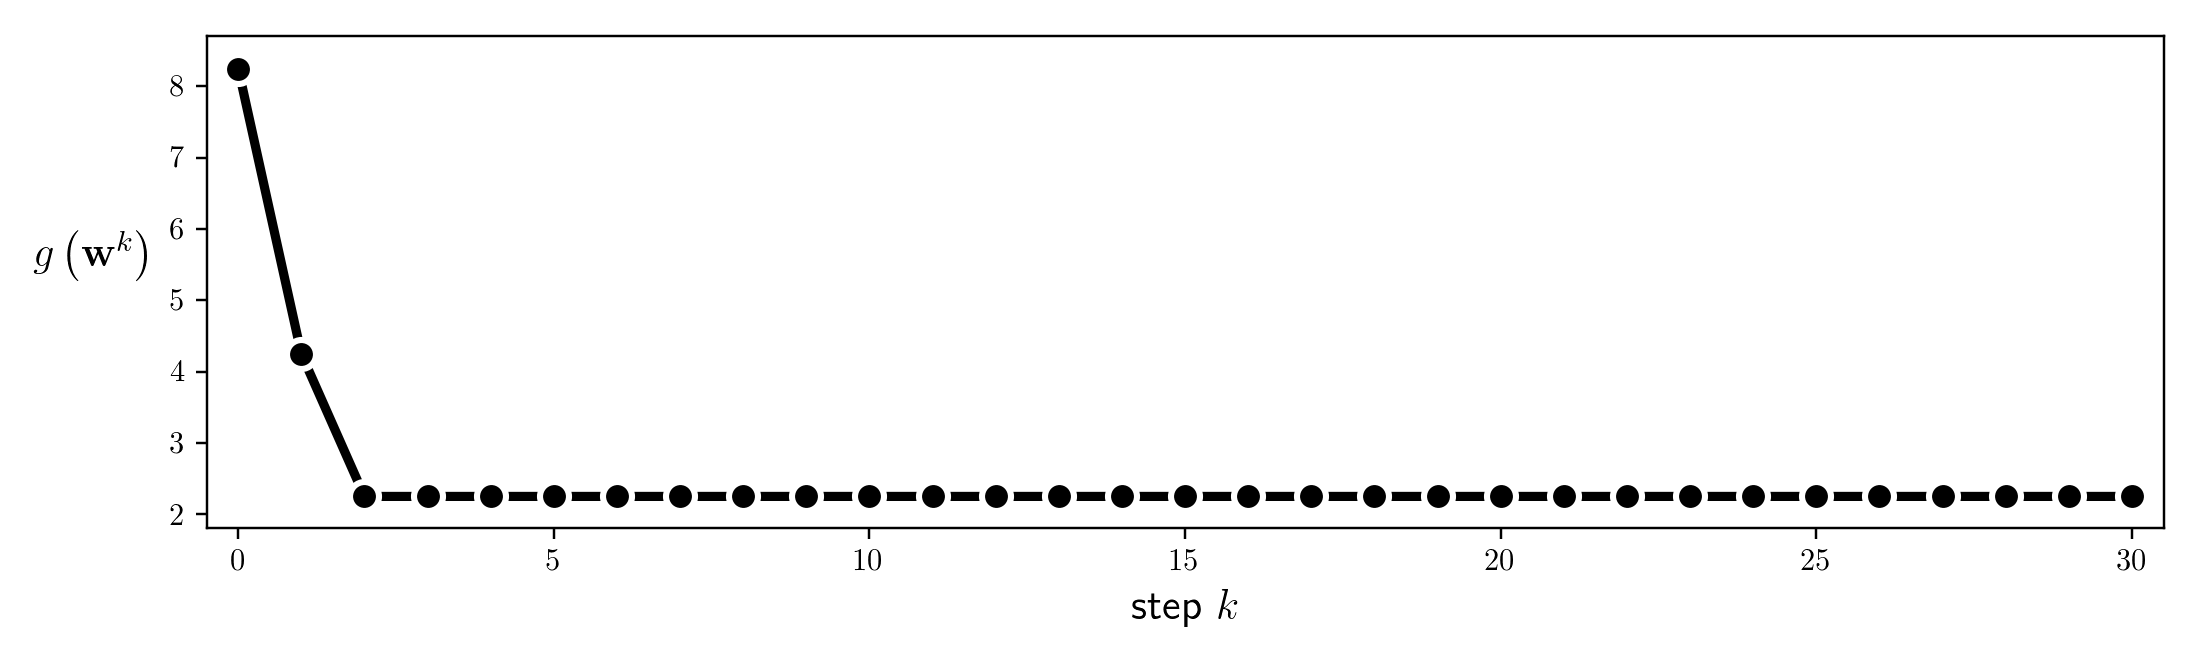

In [8]:
# This code cell will not be shown in the HTML version of this notebook
# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history_1],start = 0,points = True)

- Setting the steplength parameter $\alpha$ smaller we can look again make another run mirroring the one performed above, with much better results.  


- Below we make the same run as above except now we set $\alpha = 0.1$ for all steps.  Running the algorithm now we can see that it converges to a point much closer to the global minimum of the function at $\mathbf{w} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.

<IPython.core.display.Javascript object>


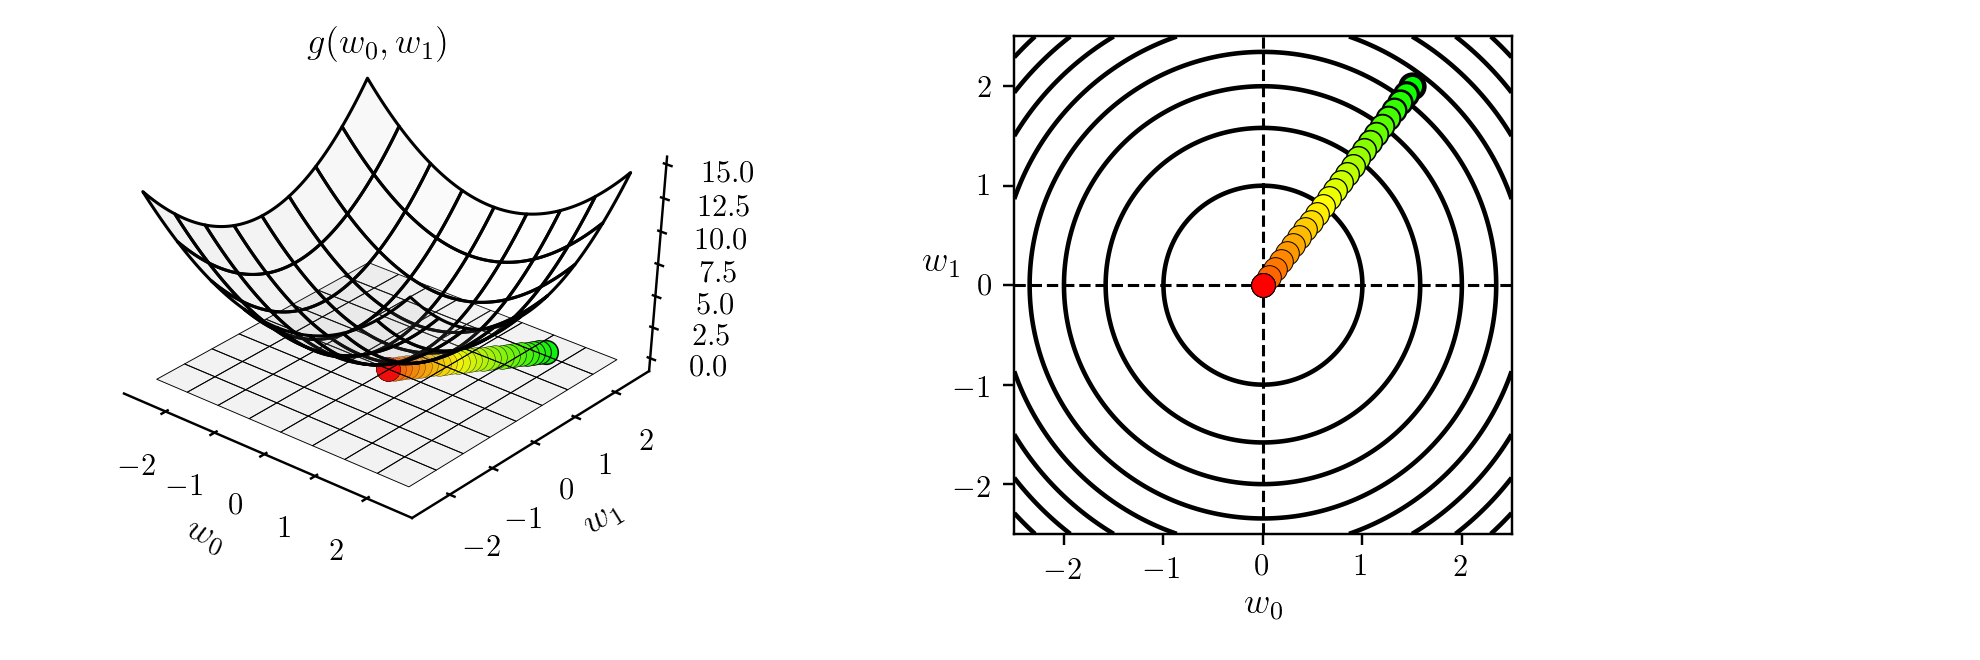

In [9]:
# This code cell will not be shown in the HTML version of this notebook
# define function
g = lambda w: np.dot(w.T,w) + 2

# run random search algorithm 
alpha_choice = 0.1; w = np.array([1.5,2]); num_samples = 1000; max_its = 30;
weight_history_2,cost_history_2 = random_search(g,alpha_choice,max_its,w,num_samples)

# animate 2d slope visualizer
view = [40,-50]
optlib.random_local_search.visualize3d(g,weight_history_2,cost_history_2,view = view,wmax=max(w[0],w[1]),plot_final = False,axes = True)

- Remember however that we need to be careful in choosing the steplength value with this simple quadratic, and by extension any general function.  


- If - for example - we run the same experiment again but cut the steplength down to $\alpha = 0.01$ we do not reach a point anywher near the global minimum, as we show by performing the same run but setting $\alpha$ to this value in the next Python cell.  

<IPython.core.display.Javascript object>


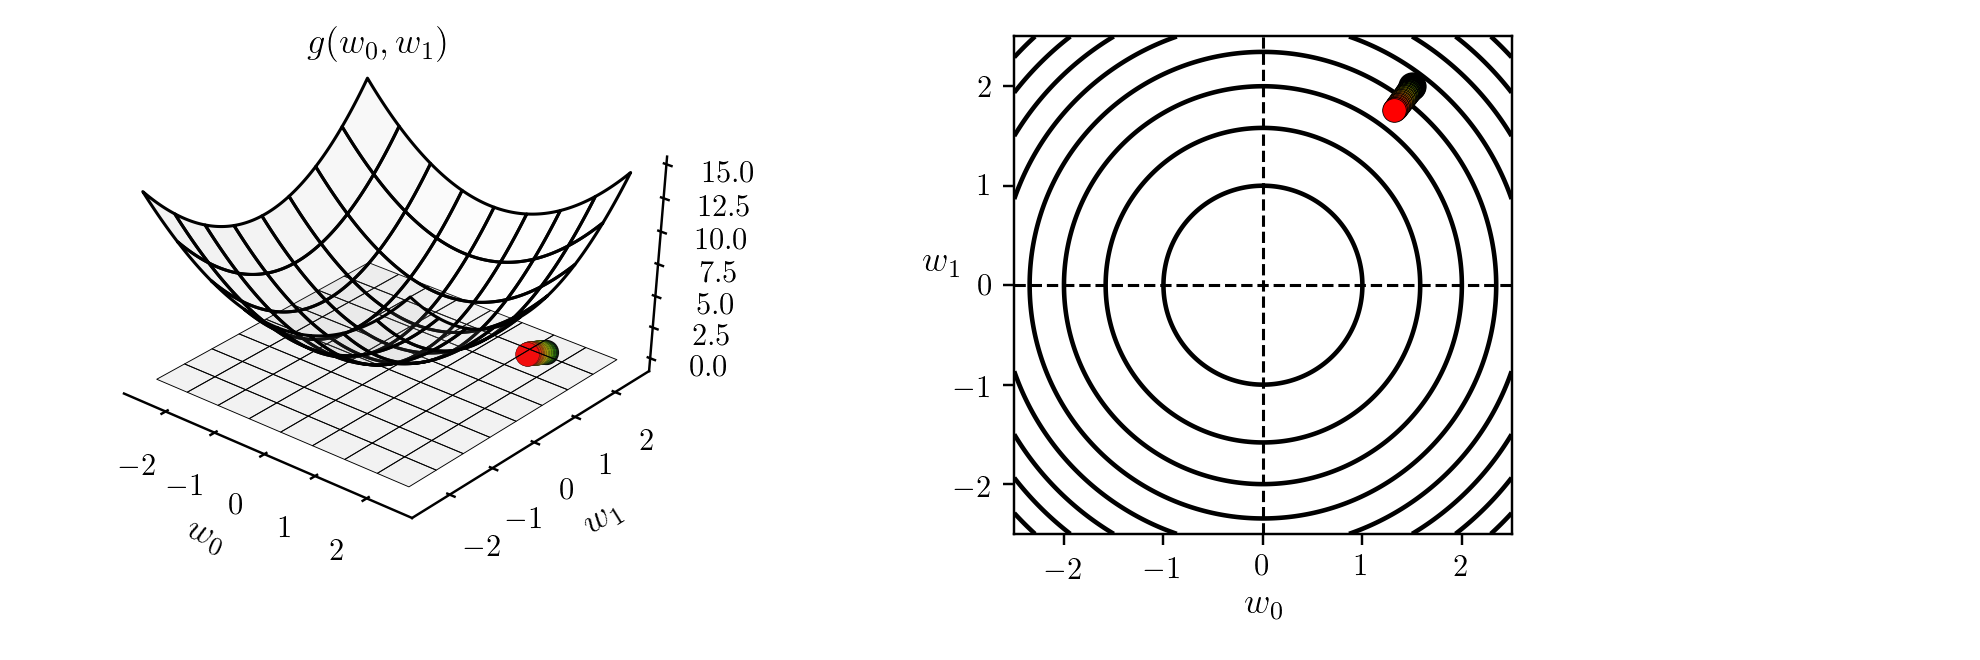

In [10]:
# This code cell will not be shown in the HTML version of this notebook
# define function
g = lambda w: np.dot(w.T,w) + 2

# run random search algorithm 
alpha_choice = 0.01; w = np.array([1.5,2]); num_samples = 1000; max_its = 30;
weight_history_3,cost_history_3 = random_search(g,alpha_choice,max_its,w,num_samples)

# animate 2d slope visualizer
view = [40,-50]
optlib.random_local_search.visualize3d(g,weight_history_3,cost_history_3,view = view,wmax=max(w[0],w[1]),plot_final = False,axes = True)

- Thus in general the combination of steplength and maximum number of iterations are best chosen together.  


- The trade-off here is simple: a small stepsize combined with a large number of steps can guarantee convergence to towards a local minimum, but can be very computationally expensive.  


- Conversely a large steplength and small number of maximum iterations can - as we saw in Example 6 - be cheaper but less effective at finding small evaluation points.

<IPython.core.display.Javascript object>


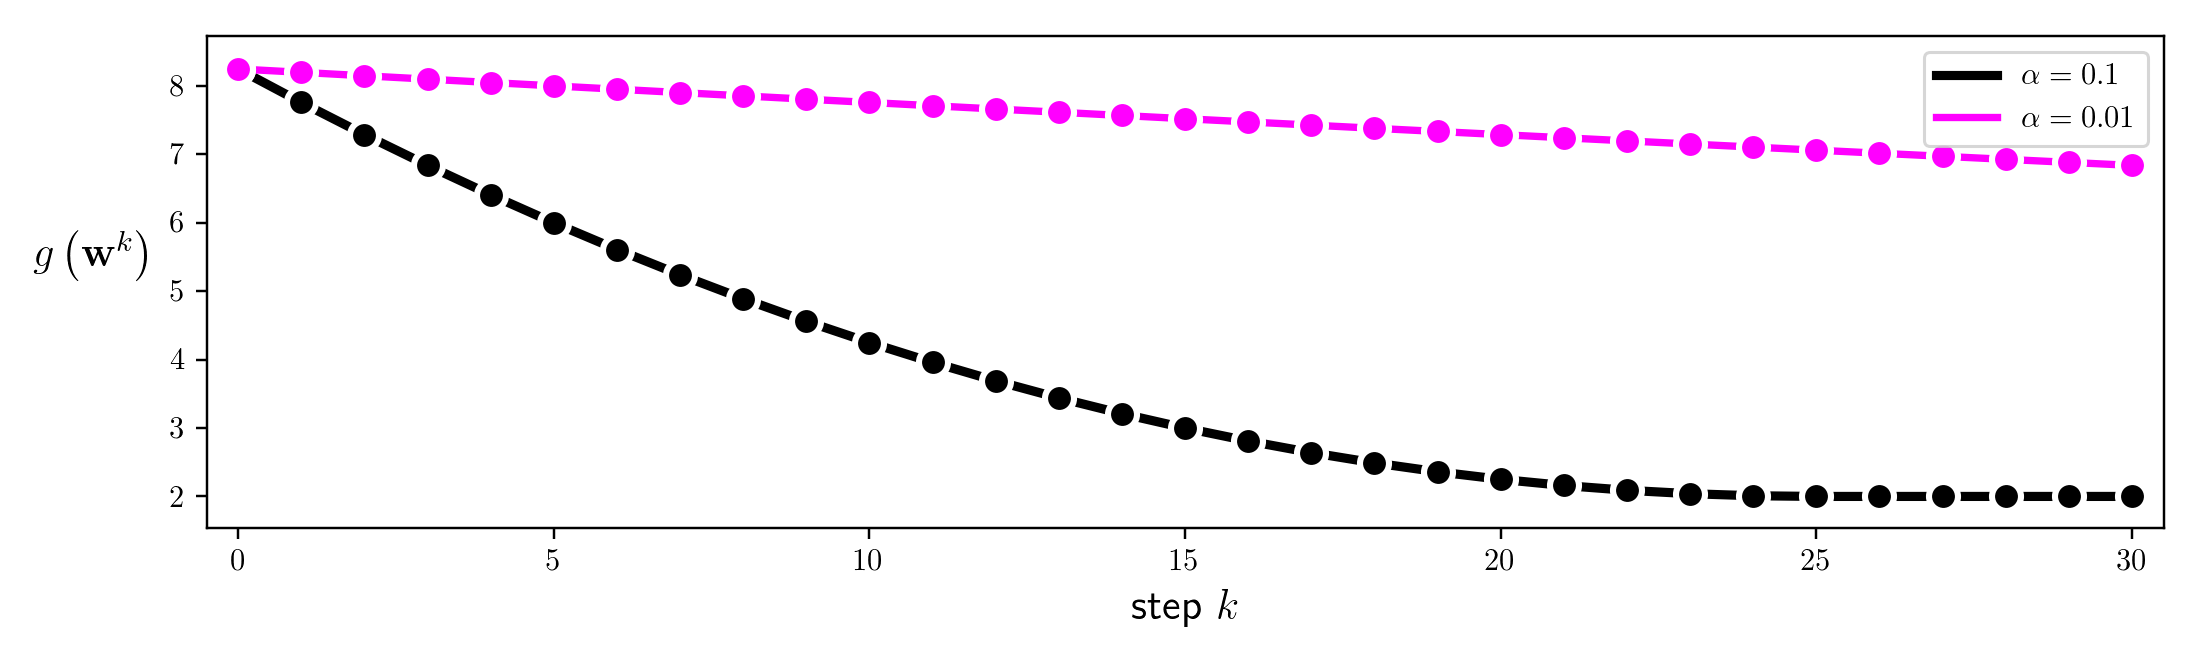

In [11]:
# This code cell will not be shown in the HTML version of this notebook
# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history_2,cost_history_3],start = 0,points = True,labels = [r'$\alpha = 0.1$',r'$\alpha = 0.01$'])

- Another choice we have in choosing steplengths is to change its value at each step.  


- For more advanced local search algorithms there are a host of ways of doing this.   

- One simple approach: diminish the size of the steplength at each step.  


- This is a safe choice of steplength because it ensures that the algorithm can get into any 'small nooks and crannies' where a function's minima may lie.  This is often referred to as a *diminishing steplength rule*.

- A common way of producing a diminishing steplength is tto set $\alpha = \frac{1}{k}$ at the $k^{th}$ step of the process.  

\begin{equation}
\Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \Vert \left(\mathbf{w}^{k-1} + \alpha\mathbf{d}\right) - \mathbf{w}^{k-1} \Vert_2  = \Vert \alpha \mathbf{d}  \Vert_2 = \alpha \Vert \mathbf{d}  \Vert_2 = \alpha = \frac{1}{k}.
\end{equation}


- This gives us the benefit of shrinking the distance between subsequent steps as we progress, while at the same time we can see that

\begin{equation}
\sum_{k=1}^{K} \Vert \mathbf{w}^k - \mathbf{w}^{k-1} \Vert_2 = \sum_{k=1}^{K}\frac{1}{k}
\end{equation}

- The beauty of this choice of stepsize is that clearly the stepsize decreases to zero as $k$ increases i.e., $\alpha = \frac{1}{k} \longrightarrow 0$.


- Simultaneously the total distance traveled by the algorithm goes to infinity as $k$ increases i.e., $\sum_{k=1}^{K}\frac{1}{k} \longrightarrow \infty$.


- In theory this means that an algorithm employing this sort of diminishing steplength rule can move around an infinite distance in search of a minimum all the while taking smaller and smaller steps.

##  The curse of dimensionality and random search

- As with the global optimization approach discussed in the previous Section, the curse of dimensionality also poses a major obstacle to random search as the dimension of a function's input increases. 


- We illustrate this using a sequence of simple quadratic functions (where we will gradually increase the input dimension $N$)

\begin{equation}
g\left(\mathbf{w}\right)=\mathbf{w}^{T}\mathbf{w}+2
\end{equation}

- Starting at origin when $N=1$ this reduces to finding a descent direction at random for the function $g(w)=w^2$ starting at $w^0=1$, as shown in the figure below. 


- Starting at $w^0=1$, there are only 2 unit directions we can move in: (i) the negative direction toward the origin shown in yellow, which is a descent direction (as it takes us to the minimum of our quadratic function), or (ii) away from the origin shown in blue, which is indeed an ascent direction (as the function evaluation increases at its endpoint). 

<p>
<img src= '../../mlrefined_images/math_optimization_images/hypersphere_1d.png' width="75%" height="75%"/>
</p>

- So in this case, if we decide to choose our direction randomly we will have a $\frac{1}{2}=50\%$ descent probability. Not too bad!  

- Now let's see what happens when $N=2$. 


- As shown in the picture below we now have infinitely many unit directions to choose from, where only a fraction of them whose endpoint lie inside the unit circle (centered at origin) are descent directions. 

<p>
<img src= '../../mlrefined_images/math_optimization_images/hypersphere_2d.png' width="100%" height="150%"/>
</p>

- Thus if we choose another unit direction randomly, the descent probability would be calculated as the length of the yellow arc in the figure divided by the entire length of the unit circle centered at $\mathbf{w}^{0}$.

\begin{equation}
\text{descent probability}=\frac{\text{length of yellow arc}}{\text{length of unit circle}}
\end{equation}

- For more clarity, the two-dimensional input space is re-drawn from above in the right panel of the figure below.     

- Notice the black circle shown in the right panel, centered at the midpoint of $\mathbf{w}^{0}$ and the origin, completely encompasses the yellow arc, and hence one-half of its length is greater than that of the yellow arc. 


- In other words, the length of the yellow arc is upper-bounded by the length of the black semi-circle that lie inside the unit circle, and we have  

\begin{equation}
\text{descent probability}<\frac{1}{2}\cdot\frac{\text{length of black circle}}{\text{length of unit circle}}
\end{equation}



- Both the numerator and the denominator are now easy to compute, noticing that a simple application of the Pythagorean theorem gives the radius of the black circle as $\frac{\sqrt{3}}{2}$.

\begin{equation}
\text{descent probability}<\frac{1}{2}\cdot\frac{2\pi\left(\frac{\sqrt{3}}{2}\right)}{2\pi\left(1\right)}=\frac{\sqrt{3}}{4}=0.433
\end{equation}

- Therefore in two dimensions, the chance of randomly selecting a descent direction is at most 43%, down 7% from its value in one dimension. 

- This rather slight decrease may not seem like a deal breaker at first, but as we travel into larger and larger dimensions we can easily determine that the descent probability shrinks exponentially in $N$. 


- This is because in higher dimensions we can still use the same geometric argument we made above to find an upperbound to the descent probability, only this time we are dealing with hyperspheres instead of circles. 

- More specifically, in $N$ we can write  

\begin{equation}
\text{descent probability}<\frac{1}{2}\cdot\left(\frac{\sqrt{3}}{2}\right)^{N-1}
\end{equation}



- So, for instance, when $N=30$ the descent probability falls below 1%. 



- Thus the probability of choosing a descent direction falls *rapidly* at each step of random search as the input dimension increases, making the method quite ineffective.